<a href="https://colab.research.google.com/github/Tech-Spookezz/Deep-Learning/blob/main/GRU_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

In [ ]:
# Set the maximum number of words to consider in the vocabulary
max_words = 5000

In [ ]:
# Load the IMDb dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

In [ ]:
# Pad sequences to a maximum length
max_sequence_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_sequence_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_sequence_length)

In [ ]:
# Define the GRU RNN model
embedding_size = 32
model = Sequential()
model.add(Embedding(max_words, embedding_size, input_length=max_sequence_length))
model.add(GRU(100))  # 100 units in the GRU layer
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

Epoch 1/5
391/391 [==============================] - 303s 768ms/step - loss: 0.5135 - accuracy: 0.7449 - val_loss: 0.3632 - val_accuracy: 0.8506
Epoch 2/5
391/391 [==============================] - 281s 719ms/step - loss: 0.3474 - accuracy: 0.8520 - val_loss: 0.3313 - val_accuracy: 0.8636
Epoch 3/5
391/391 [==============================] - 280s 716ms/step - loss: 0.3081 - accuracy: 0.8706 - val_loss: 0.3298 - val_accuracy: 0.8593
Epoch 4/5
391/391 [==============================] - 294s 752ms/step - loss: 0.2392 - accuracy: 0.9075 - val_loss: 0.3198 - val_accuracy: 0.8668
Epoch 5/5
391/391 [==============================] - 295s 756ms/step - loss: 0.1991 - accuracy: 0.9260 - val_loss: 0.3134 - val_accuracy: 0.8768


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

782/782 [==============================] - 52s 67ms/step - loss: 0.3134 - accuracy: 0.8768
Test Loss: 0.3134419322013855
Test Accuracy: 0.8768399953842163


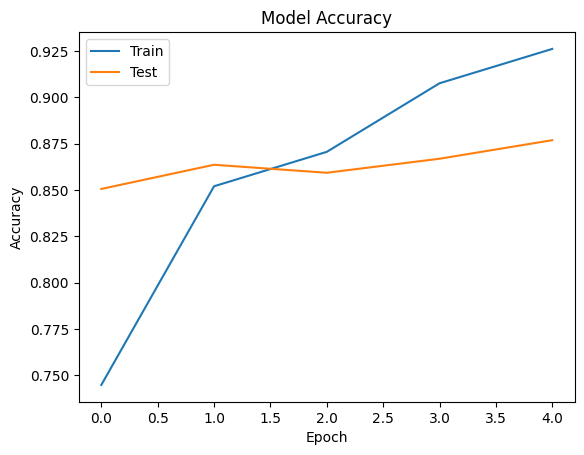

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

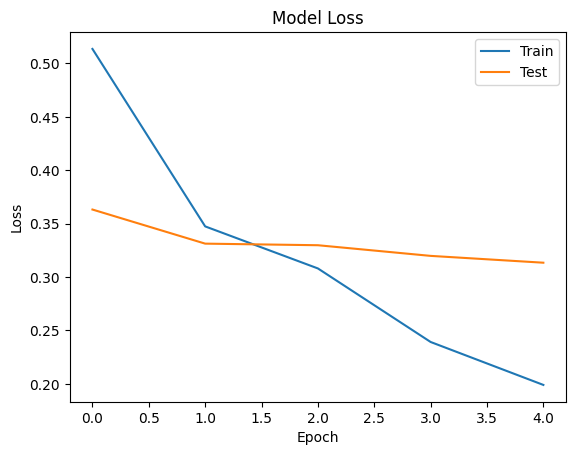

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()